# tt_task2 _costumer online retail



In [1]:

#importing libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt

In [3]:
df = pd.read_excel('or.xlsx')

In [4]:
df.shape

(541909, 8)

In [5]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
#since there are missing attributes so we will be using ffill

In [9]:
df['CustomerID'].ffill()

0         17850.0
1         17850.0
2         17850.0
3         17850.0
4         17850.0
           ...   
541904    12680.0
541905    12680.0
541906    12680.0
541907    12680.0
541908    12680.0
Name: CustomerID, Length: 541909, dtype: float64

In [44]:
df['Description'].mode()[0] #most sold item 

'WHITE HANGING HEART T-LIGHT HOLDER'

In [45]:
df['CustomerID'] = df['CustomerID'].fillna(method='ffill')

In [46]:
df['Description'] = df['Description'].fillna("unnamed")


In [47]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [48]:
 #lets figure out failed orders or cancelled orders

In [49]:
fo=df[df['InvoiceNo'].astype(str).str.contains('C')]
print(fo)

       InvoiceNo StockCode                       Description  Quantity  \
141      C536379         D                          Discount        -1   
154      C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235      C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236      C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237      C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   
...          ...       ...                               ...       ...   
540449   C581490     23144   ZINC T-LIGHT HOLDER STARS SMALL       -11   
541541   C581499         M                            Manual        -1   
541715   C581568     21258        VICTORIAN SEWING BOX LARGE        -5   
541716   C581569     84978  HANGING HEART JAR T-LIGHT HOLDER        -1   
541717   C581569     20979     36 PENCILS TUBE RED RETROSPOT        -5   

               InvoiceDate  UnitPrice  CustomerID         Country  
141    2010-12-01 09:41:00      27.50     1

In [53]:
fo.shape

(9288, 8)

In [55]:
df['tcost']=df['Quantity']*df['UnitPrice']
df.groupby('Country').sum().sort_values(by='tcost',ascending=False)

,Quantity,UnitPrice,CustomerID,tcost
Country,,,,
United Kingdom,4263829,2245715.474,7.660821e+09,8187806.364
Netherlands,200128,6492.550,3.419054e+07,284661.540
EIRE,142637,48447.190,1.210253e+08,263276.820
Germany,117448,37666.000,1.200751e+08,221698.210
France,110480,43031.990,1.086602e+08,197403.900
Australia,83653,4054.750,1.569300e+07,137077.270
Switzerland,30325,6813.690,2.592721e+07,56385.350
Spain,26824,12633.450,3.268929e+07,54774.580
Belgium,23152,7540.130,2.571829e+07,40910.960


<AxesSubplot:xlabel='Country', ylabel='tcost'>

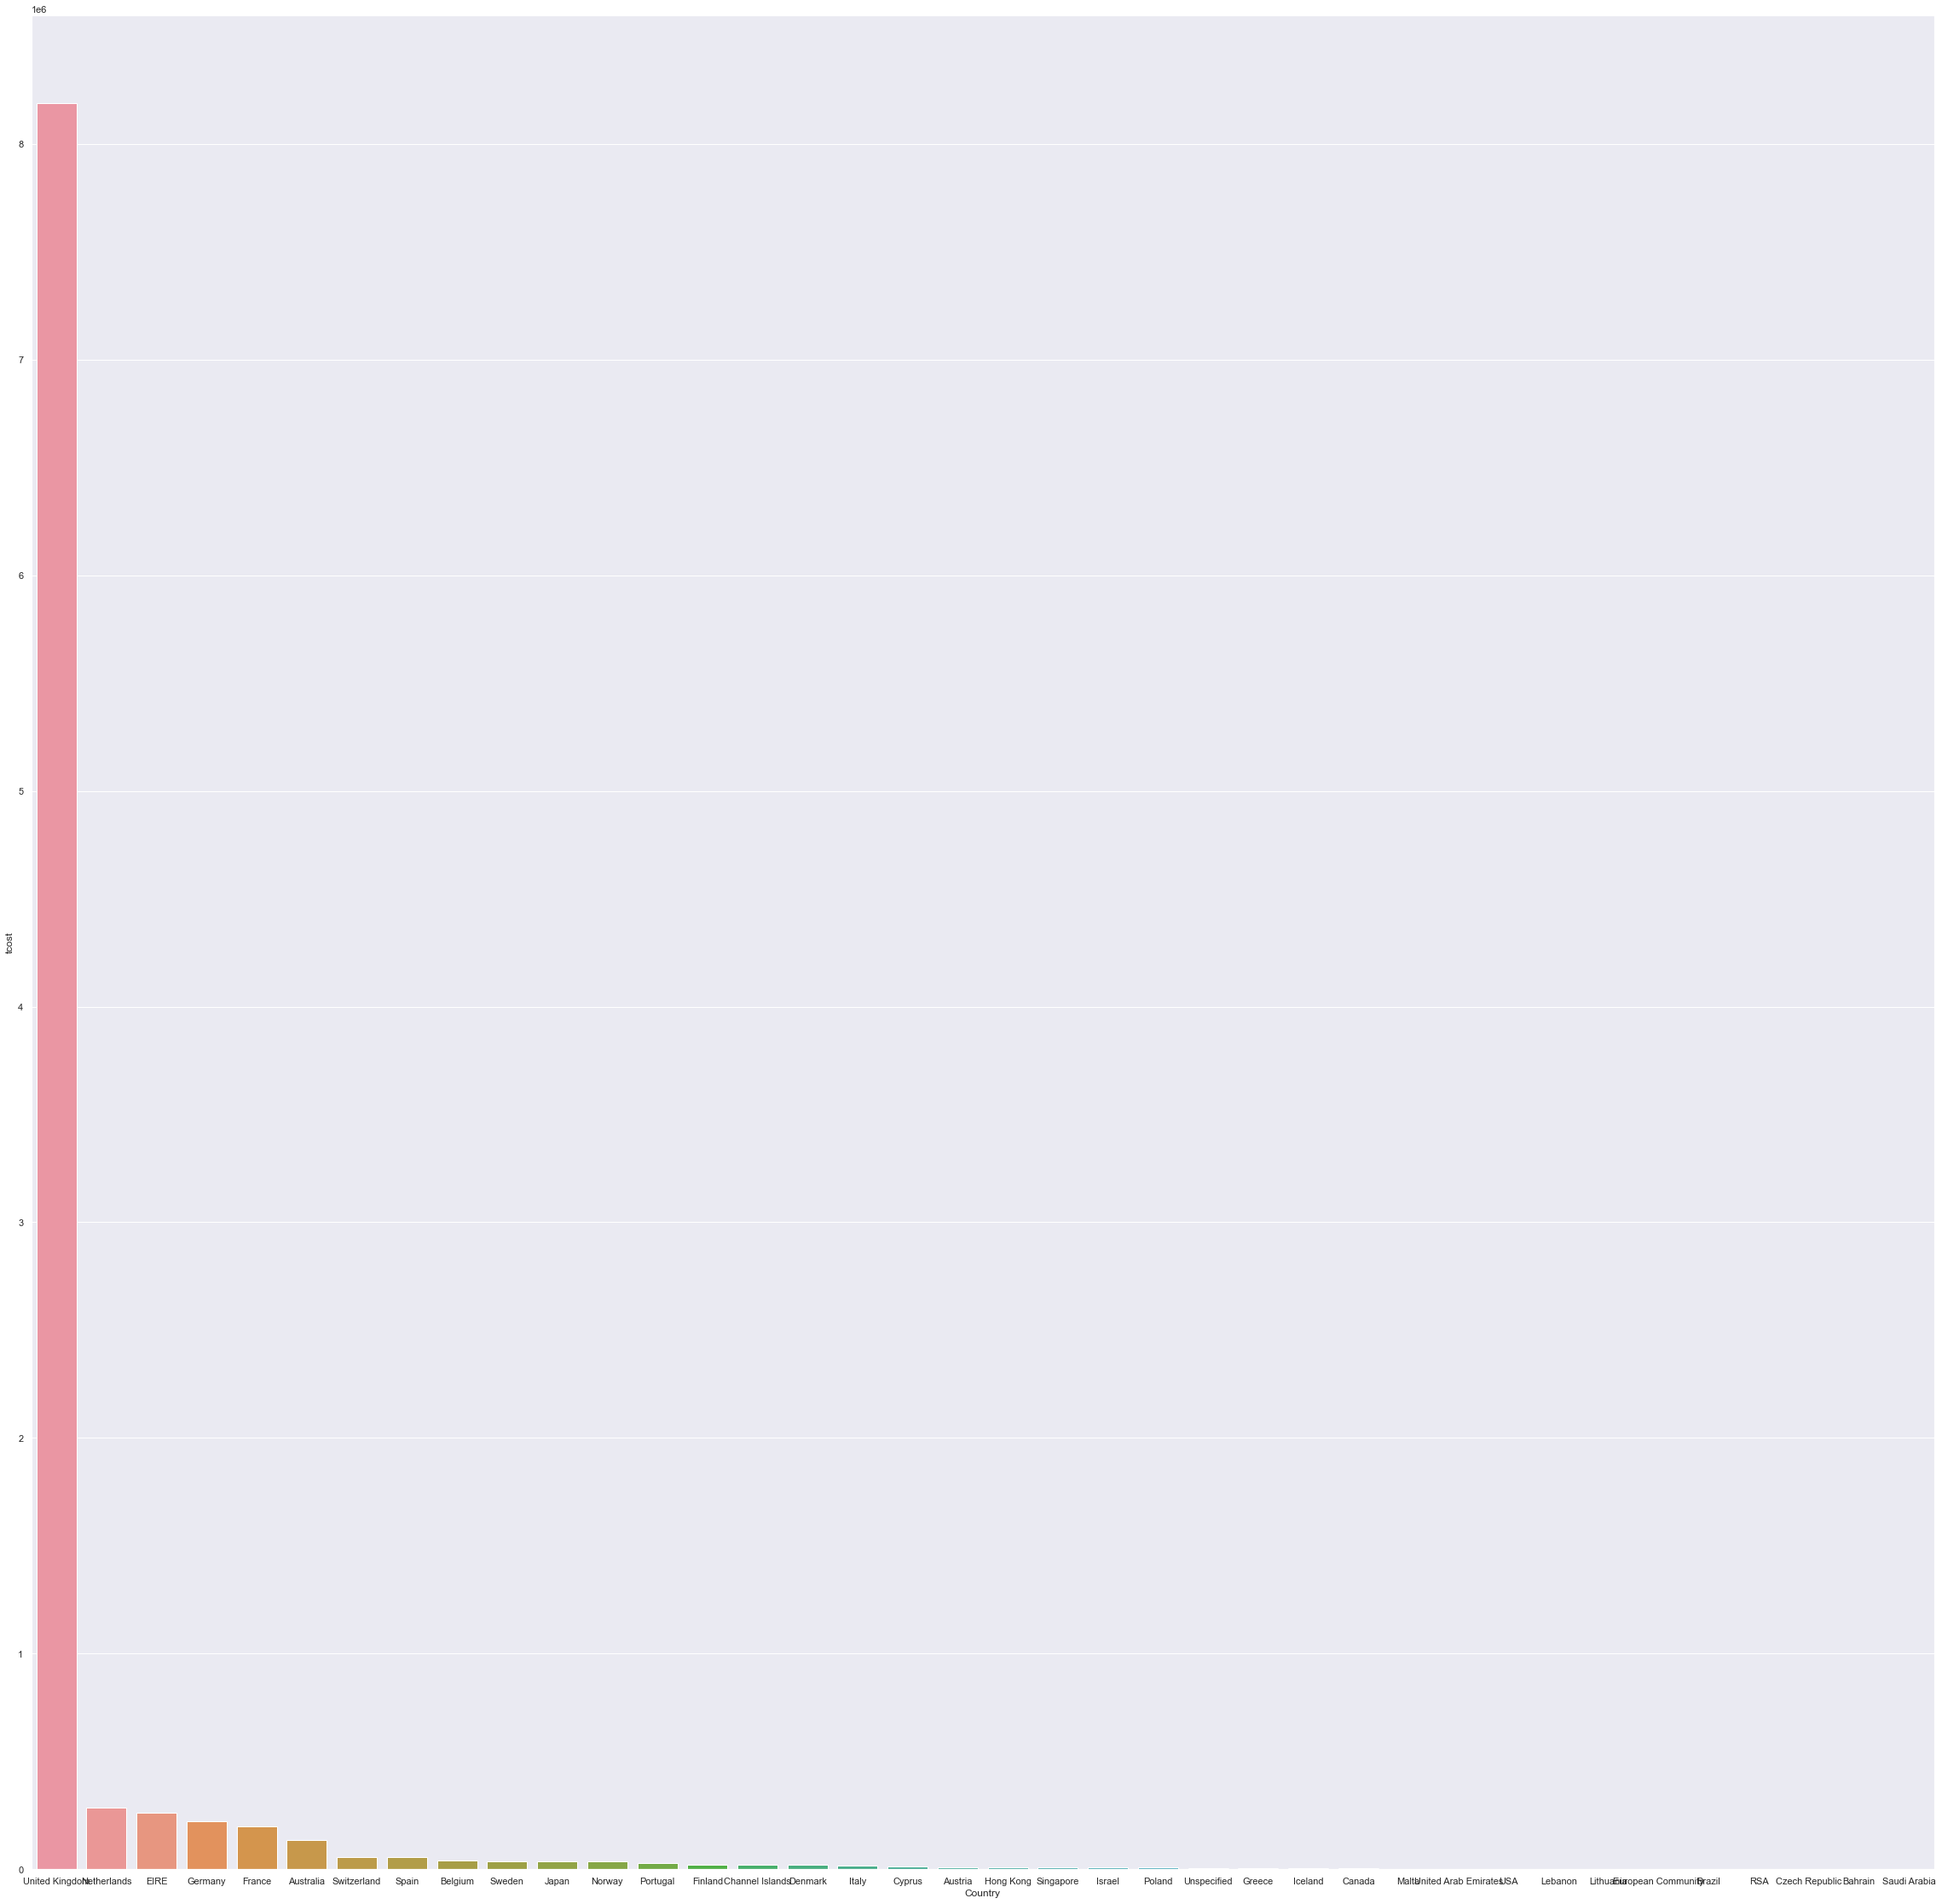

In [57]:
sales_a =df.groupby(['Country'], as_index=False)['tcost'].sum().sort_values(by='tcost',ascending=False)
sns.set(rc={'figure.figsize':(40,40)})

sns.barplot(x='Country', y='tcost' , data= sales_a)

<AxesSubplot:xlabel='Description', ylabel='UnitPrice'>

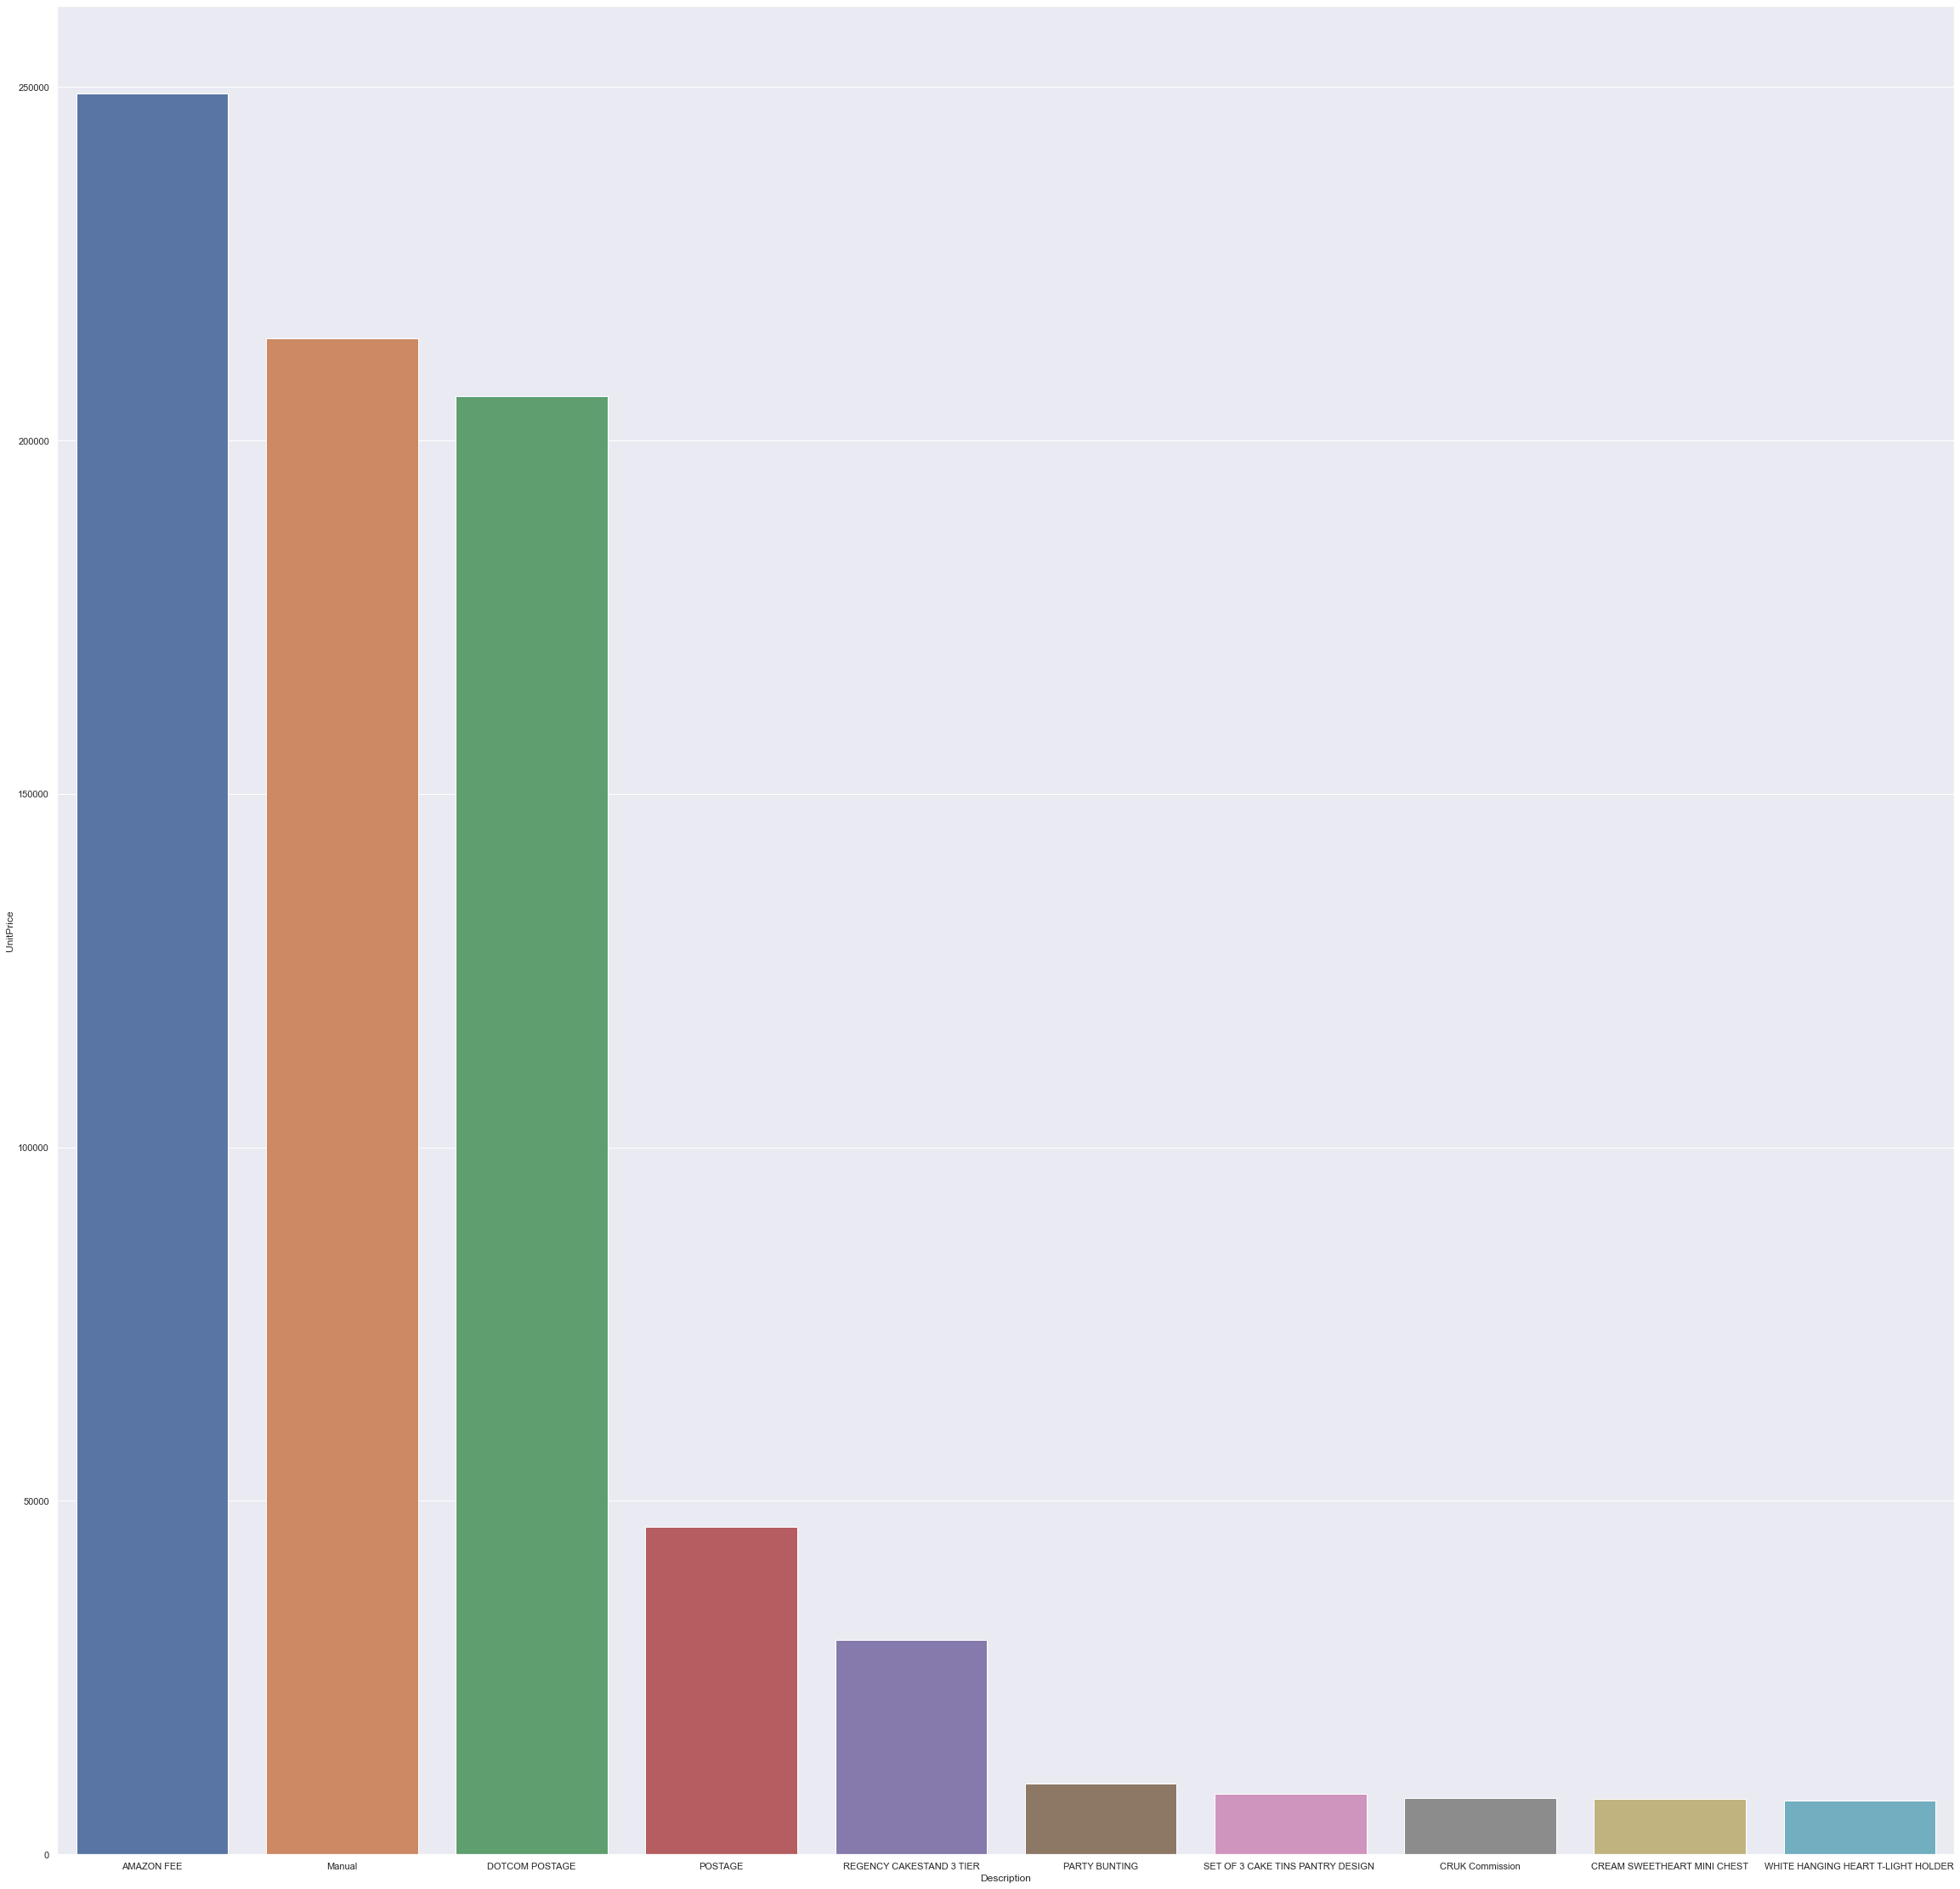

In [62]:
sales_p =df.groupby(['Description'], as_index=False)['UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False).head(10)
sns.barplot(x='Description', y='UnitPrice' , data= sales_p)

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

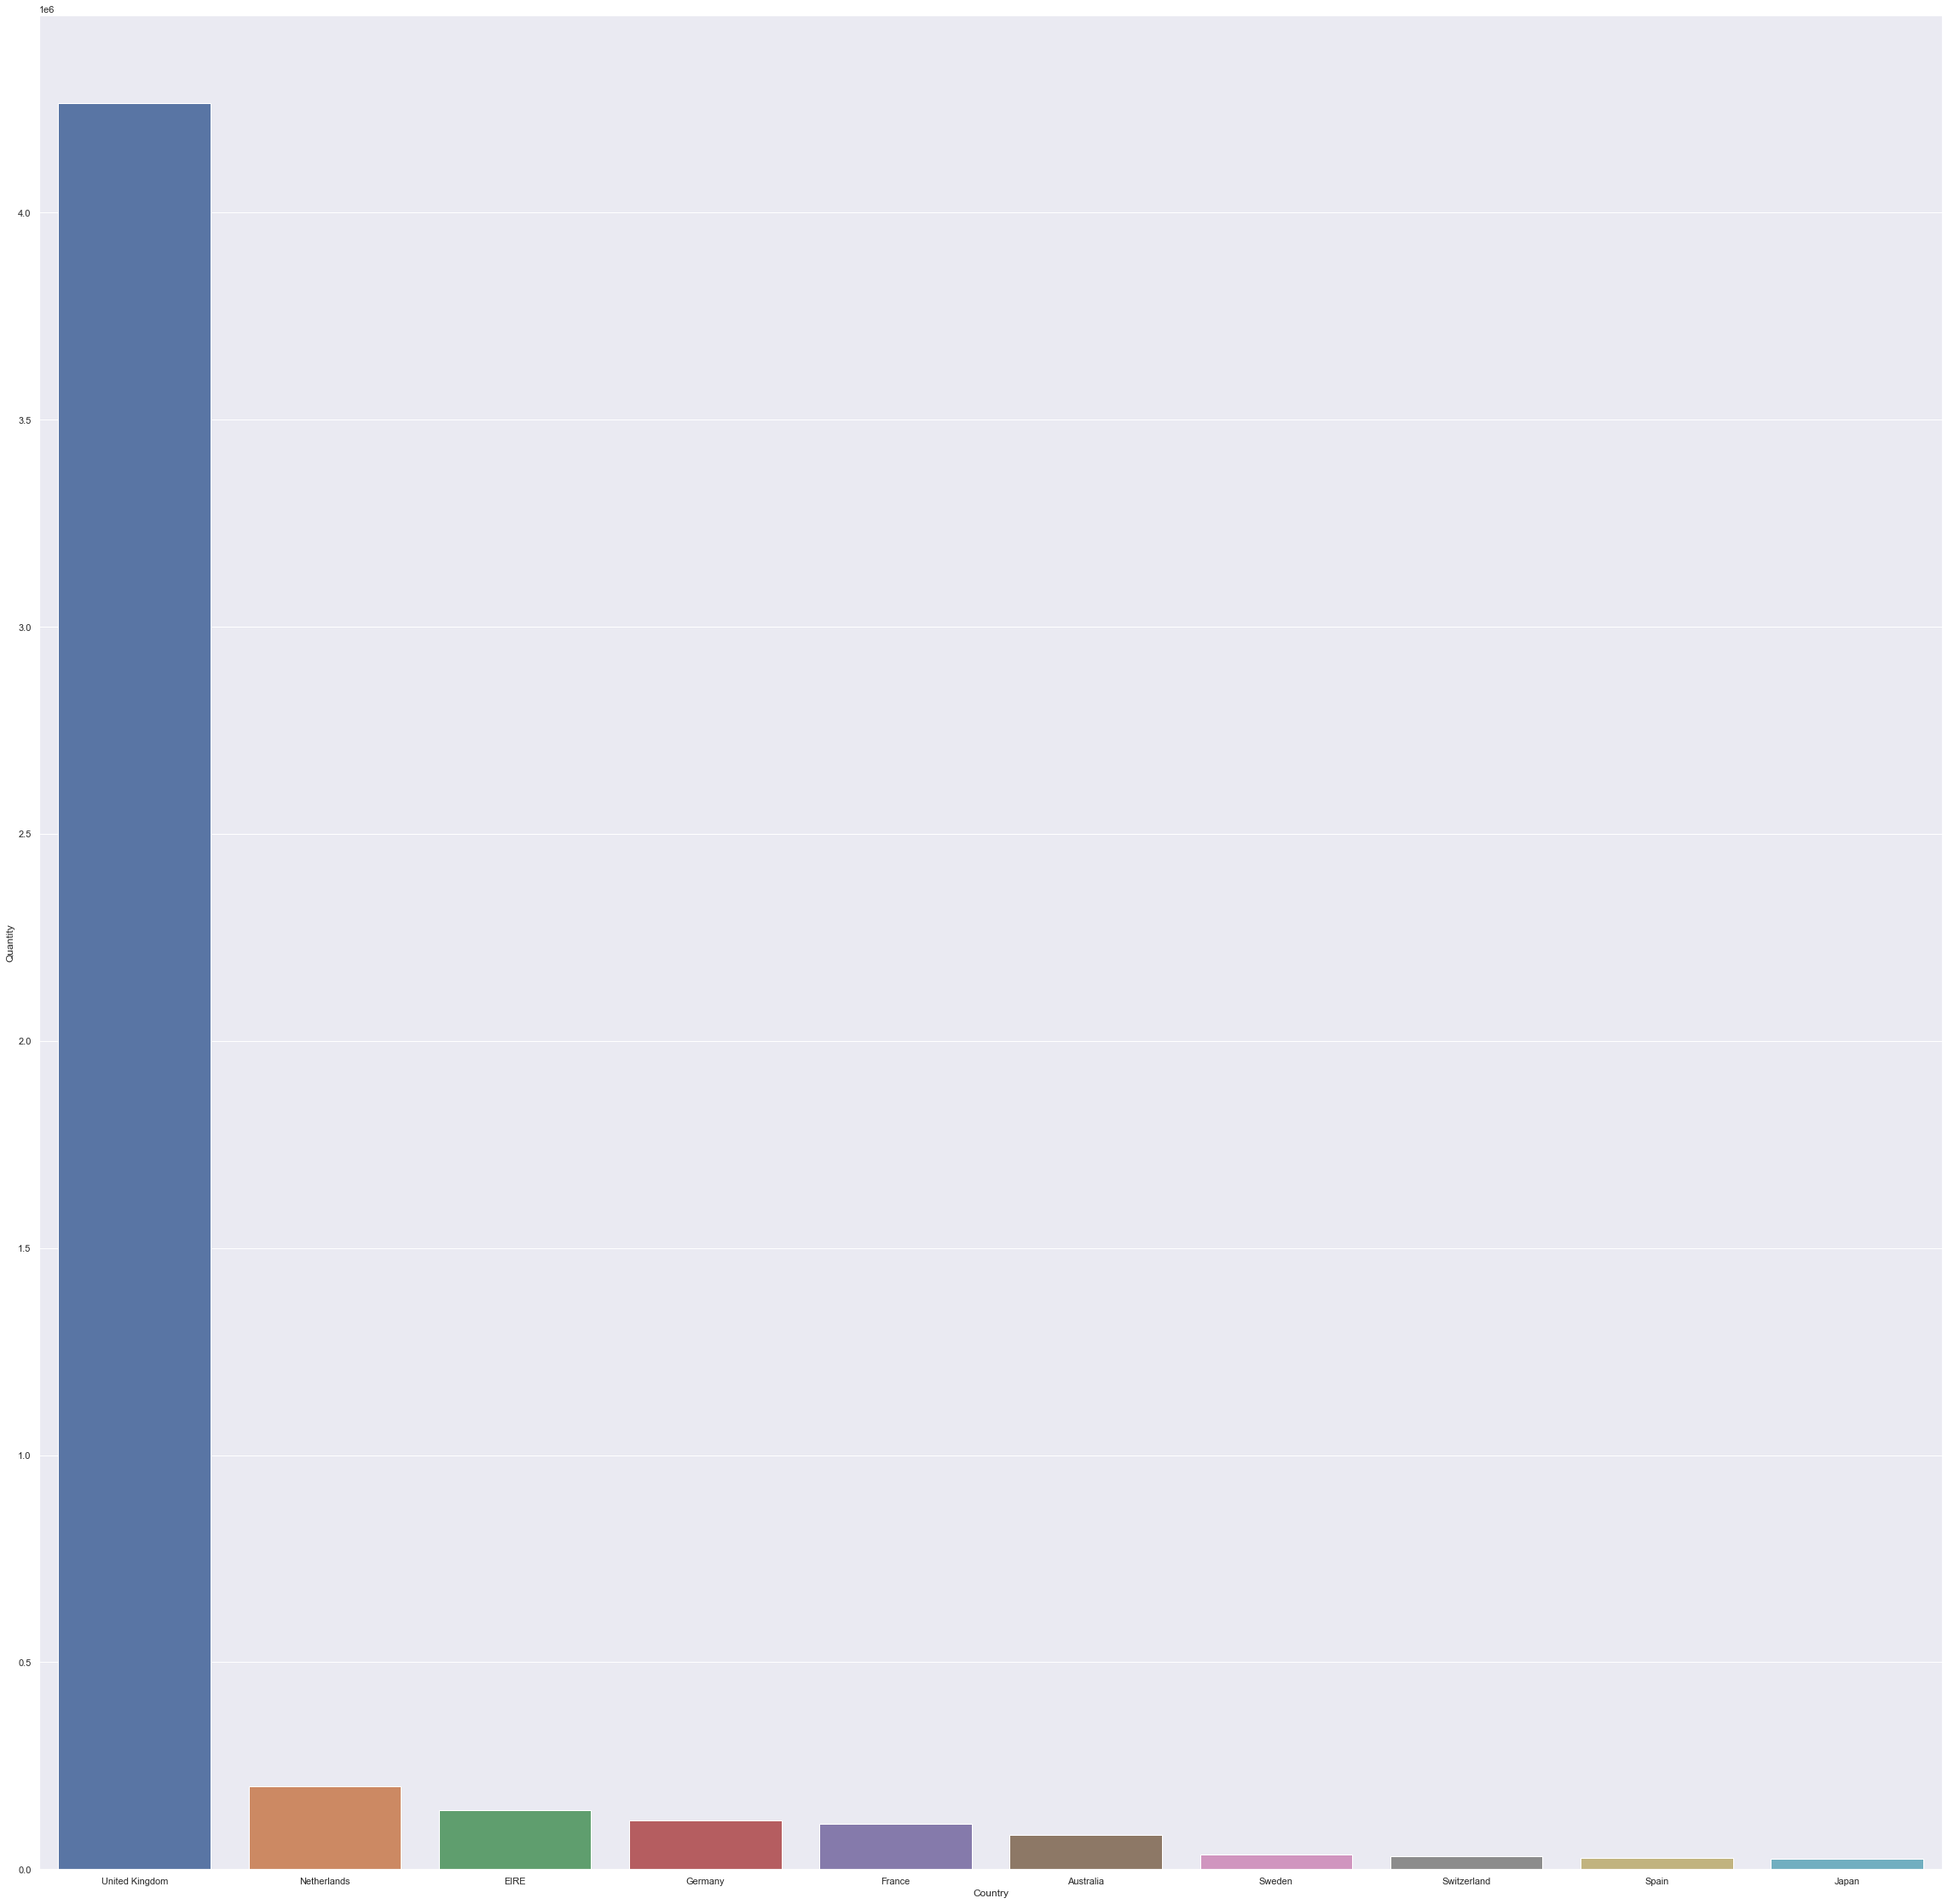

In [66]:
sales_m =df.groupby(['Country'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(10)
sns.barplot(x='Country', y='Quantity' , data= sales_m)